# Prediccion de Bancarrota

## Preprocesamiento del Set

### Inicialización de librerias

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display # Allows the use of display() for DataFrames
from bokeh.plotting import figure, output_file, show
from scipy.io import arff
# To analyze the type of missing data
import missingno as msno
# To perform mean imputation
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer
import plotly.express as px


### Carga de información

In [2]:
data = arff.loadarff('D:\Personal\Cenfotec\Modulo 5\Proyecto Final\Source\year.arff')
df = pd.DataFrame(data[0])
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0'
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0'
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0'
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0'
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0'


### Se imprime el dataset para la revisión del mismo

In [3]:
display(df)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.04720,32.3510,0.388250,0.249760,1.330500,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,b'0'
1,0.209120,0.49988,0.47225,1.94470,14.7860,0.000000,0.258340,0.996010,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,b'0'
2,0.248660,0.69592,0.26713,1.55480,-1.1523,0.000000,0.309060,0.436950,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,b'0'
3,0.081483,0.30734,0.45879,2.49280,51.9520,0.149880,0.092704,1.866100,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,b'0'
4,0.187320,0.61323,0.22960,1.40630,-7.3128,0.187320,0.187320,0.630700,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,0.018371,0.47410,-0.13619,0.60839,-18.4490,0.018371,0.018371,0.972030,1.01210,0.460840,...,0.011909,0.039866,0.98809,0.274140,73.5050,79.2370,31.268,11.6730,5.14890,b'1'
7023,-0.013359,0.58354,-0.02265,0.92896,-42.2320,-0.013359,-0.015036,0.562890,0.98904,0.328470,...,-0.011082,-0.040671,1.01110,0.805920,10.5990,7.1740,94.092,3.8792,1.75720,b'1'
7024,0.006338,0.50276,0.43923,1.87360,9.7417,0.006338,0.012022,0.983560,1.00830,0.494490,...,0.008258,0.012817,0.99174,0.000000,10.4700,6.0759,51.019,7.1542,62.00100,b'1'
7025,-0.041643,0.84810,-0.12852,0.57485,-121.9200,0.000000,-0.036795,0.179010,0.42138,0.151820,...,-0.232720,-0.274290,0.98788,3.593100,39.7030,3.1420,261.850,1.3939,0.51005,b'1'


### Revisión de Datos Faltantes

In [4]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Attr37,Attr21,Attr27,Attr60,Attr45,Attr24,Attr41,Attr11,Attr32,Attr28,...,Attr44,Attr30,Attr43,Attr42,Attr39,Attr19,Attr20,Attr23,Attr31,class
Total,2740.000000,1622.000000,311.000000,135.000000,134.00000,124.000000,84.000000,39.000000,38.000000,34.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,38.992458,23.082396,4.425786,1.921161,1.90693,1.764622,1.195389,0.555002,0.540771,0.483848,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.dropna()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.396410,2.04720,32.3510,0.388250,0.249760,1.33050,1.13890,0.50494,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,b'0'
8,0.009020,0.63202,0.053735,1.12630,-37.8420,0.000000,0.014434,0.58223,1.33320,0.36798,...,0.180110,0.024512,0.84165,0.340940,9.9665,4.2382,116.500,3.1330,2.56030,b'0'
12,0.266690,0.34994,0.611470,3.02430,43.0870,0.559830,0.332070,1.85770,1.12680,0.65006,...,0.112500,0.410250,0.88750,0.073630,9.5593,5.6298,38.168,9.5629,33.41300,b'0'
13,0.067731,0.19885,0.081562,2.95760,90.6060,0.212650,0.078063,4.02900,1.25700,0.80115,...,0.204440,0.084542,0.79556,0.196190,8.2122,2.7917,60.218,6.0613,0.28803,b'0'
14,-0.029182,0.21131,0.452640,7.57460,57.8440,0.010387,-0.034653,3.73240,1.02410,0.78869,...,0.023565,-0.037001,0.97644,0.180630,3.4646,11.3380,31.807,11.4750,1.65110,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,0.149950,0.36466,0.585980,2.66240,33.5180,0.000720,0.189720,1.74230,1.56690,0.63534,...,0.126940,0.236010,0.87372,0.004039,3.4416,4.0581,82.111,4.4452,25.45900,b'1'
7002,0.009313,0.61761,-0.222330,0.60119,-62.6300,0.000000,0.014544,0.61915,2.08020,0.38239,...,0.008170,0.024354,1.00190,0.071883,20.0000,10.0800,97.819,3.7314,3.12880,b'1'
7009,-0.091442,0.70550,-0.047216,0.92568,-7.2952,0.000000,-0.090374,0.41744,9.13450,0.29450,...,0.000966,-0.310490,1.00740,0.077583,72.8930,20.7900,25.384,14.3790,22.18000,b'1'
7019,-0.031617,0.81175,-0.202300,0.61087,-44.0110,0.000000,-0.031617,0.23190,3.03470,0.18825,...,0.018387,-0.167950,0.98125,1.101500,20.3810,20.3950,62.529,5.8373,4.44690,b'1'


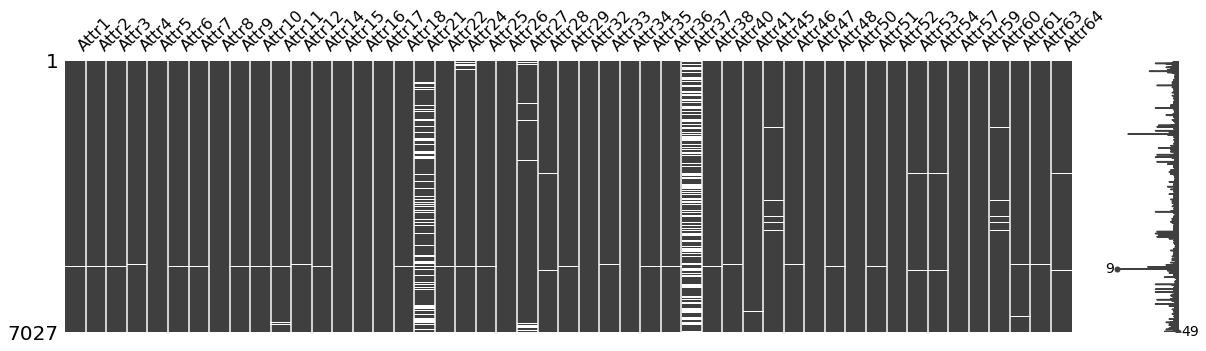

In [6]:
missing_df_i = df.columns[df.isnull().any()].tolist()
msno.matrix(df[missing_df_i], figsize=(20,5))

In [7]:
#Al ser alta la cantidad de Datos faltantes se debe proceder en remplazarlos
    # Construct an imputer with strategy as 'mean', to mean-impute along the columns

In [8]:
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer=imputer.fit(df)
dfNA=imputer.transform(df)
datasetf = pd.DataFrame(dfNA)
datasetf.columns=df.columns
datasetf

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.04720,32.3510,0.388250,0.249760,1.330500,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,0.0
1,0.209120,0.49988,0.47225,1.94470,14.7860,0.000000,0.258340,0.996010,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,0.0
2,0.248660,0.69592,0.26713,1.55480,-1.1523,0.000000,0.309060,0.436950,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,0.0
3,0.081483,0.30734,0.45879,2.49280,51.9520,0.149880,0.092704,1.866100,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,0.0
4,0.187320,0.61323,0.22960,1.40630,-7.3128,0.187320,0.187320,0.630700,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,0.018371,0.47410,-0.13619,0.60839,-18.4490,0.018371,0.018371,0.972030,1.01210,0.460840,...,0.011909,0.039866,0.98809,0.274140,73.5050,79.2370,31.268,11.6730,5.14890,1.0
7023,-0.013359,0.58354,-0.02265,0.92896,-42.2320,-0.013359,-0.015036,0.562890,0.98904,0.328470,...,-0.011082,-0.040671,1.01110,0.805920,10.5990,7.1740,94.092,3.8792,1.75720,1.0
7024,0.006338,0.50276,0.43923,1.87360,9.7417,0.006338,0.012022,0.983560,1.00830,0.494490,...,0.008258,0.012817,0.99174,0.000000,10.4700,6.0759,51.019,7.1542,62.00100,1.0
7025,-0.041643,0.84810,-0.12852,0.57485,-121.9200,0.000000,-0.036795,0.179010,0.42138,0.151820,...,-0.232720,-0.274290,0.98788,3.593100,39.7030,3.1420,261.850,1.3939,0.51005,1.0


In [9]:
datasetf.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
count,7027.000000,7027.000000,7027.000000,7027.000000,7.027000e+03,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000,...,7.027000e+03,7027.000000,7.027000e+03,7027.000000,7.027000e+03,7027.000000,7.027000e+03,7027.000000,7027.000000,7027.000000
mean,0.034660,0.560215,0.119969,2.629143,-2.631672e+02,0.059712,0.313876,2.623996,5.552855,1.825832,...,-1.577367e+02,0.193243,1.587409e+02,0.277829,4.328830e+02,15.642228,4.763202e+03,8.126852,208.731950,0.038566
std,4.564529,5.348941,5.274332,13.229022,3.705348e+04,6.049821,8.351490,18.675013,101.988190,33.829227,...,1.322125e+04,4.343737,1.322124e+04,6.338698,2.587579e+04,261.144719,3.107835e+05,19.953682,5128.255341,0.192571
min,-256.890000,-72.162000,-440.500000,0.000000,-2.722100e+06,-397.890000,-189.560000,-141.410000,0.000005,-440.550000,...,-1.108300e+06,-315.370000,-4.194000e-03,-327.970000,4.700000e-05,0.000016,0.000000e+00,0.000015,0.000010,0.000000
25%,0.021208,0.296760,0.027011,1.064100,-4.462850e+01,0.000000,0.028037,0.447340,1.037250,0.300900,...,2.031450e-02,0.056814,8.647650e-01,0.000000,6.013050e+00,4.834250,4.322250e+01,3.432500,2.550300,0.000000
50%,0.075790,0.483090,0.181180,1.505200,-5.575300e+00,0.000000,0.090177,1.022100,1.206000,0.492450,...,6.338200e-02,0.175820,9.388100e-01,0.028451,1.024900e+01,7.046300,6.850900e+01,5.327800,4.657400,0.000000
75%,0.160240,0.680170,0.362500,2.476050,3.769500e+01,0.146570,0.188880,2.286700,2.133150,0.675915,...,1.376950e-01,0.351895,9.820150e-01,0.274140,2.136650e+01,10.775500,1.063350e+02,8.326800,9.912750,0.000000
max,94.280000,441.500000,1.000000,1017.800000,9.909000e+05,303.670000,453.770000,1452.200000,3876.100000,1099.500000,...,1.000000e+00,126.670000,1.108300e+06,119.580000,2.137800e+06,21110.000000,2.501600e+07,1042.200000,294770.000000,1.000000


In [10]:
#renombran las variables a float  

In [11]:
index = 1
while(index<=63):
      colname = datasetf.columns[index]
      col = getattr(datasetf, colname)
      datasetf[colname] = col.astype(float)
      index+=1     
datasetf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027 entries, 0 to 7026
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   7027 non-null   float64
 1   Attr2   7027 non-null   float64
 2   Attr3   7027 non-null   float64
 3   Attr4   7027 non-null   float64
 4   Attr5   7027 non-null   float64
 5   Attr6   7027 non-null   float64
 6   Attr7   7027 non-null   float64
 7   Attr8   7027 non-null   float64
 8   Attr9   7027 non-null   float64
 9   Attr10  7027 non-null   float64
 10  Attr11  7027 non-null   float64
 11  Attr12  7027 non-null   float64
 12  Attr13  7027 non-null   float64
 13  Attr14  7027 non-null   float64
 14  Attr15  7027 non-null   float64
 15  Attr16  7027 non-null   float64
 16  Attr17  7027 non-null   float64
 17  Attr18  7027 non-null   float64
 18  Attr19  7027 non-null   float64
 19  Attr20  7027 non-null   float64
 20  Attr21  7027 non-null   float64
 21  Attr22  7027 non-null   float64
 22  

### Al ser un módelo de Clasificación, Se cambian variables a categoricas

In [12]:
#Se cambia el tipo a categoria
datasetf=datasetf.astype({'class':'category'})

In [13]:
#Rename Columna de Bancarrota por valores de mejor entendimiento
datasetf['class']=datasetf['class'].replace({0.0: "N"})
datasetf['class']=datasetf['class'].replace({1.0: "Y"})

In [14]:
datasetf['class']

0       N
1       N
2       N
3       N
4       N
       ..
7022    Y
7023    Y
7024    Y
7025    Y
7026    Y
Name: class, Length: 7027, dtype: object

### Matriz de Correlación

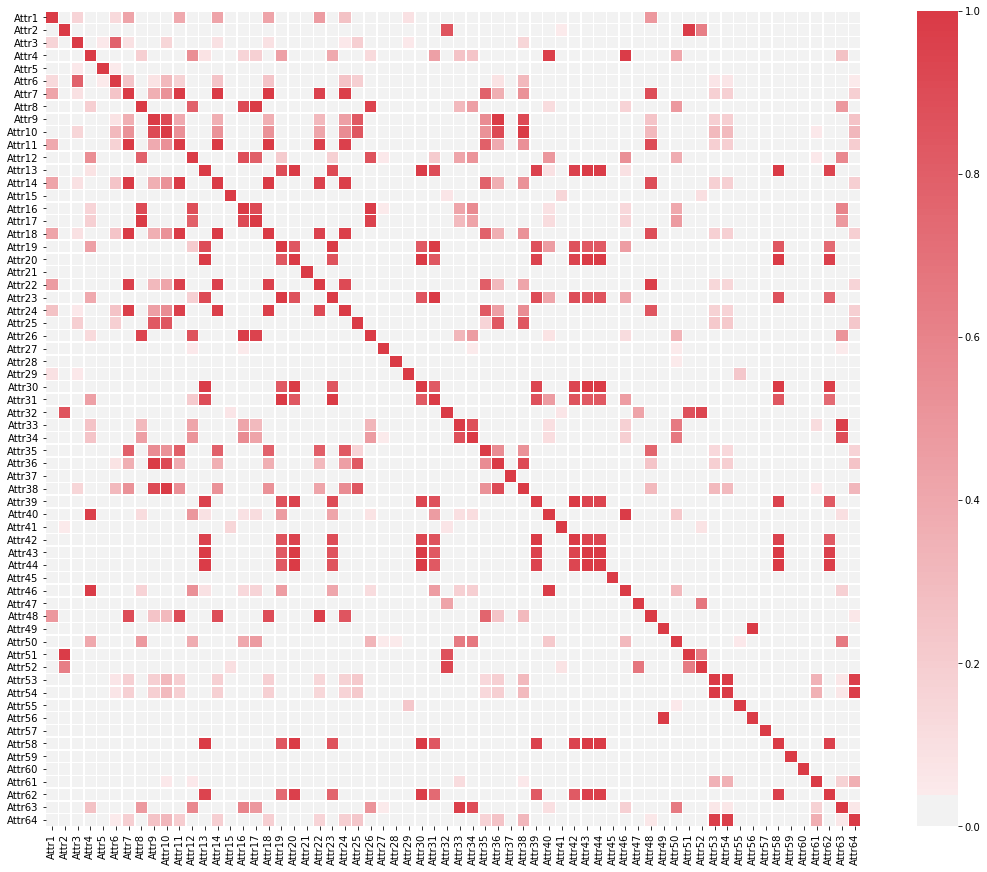

In [36]:
import seaborn as sns

corr = datasetf.drop('class',axis=1).corr()
f, ax = plt.subplots(figsize=(20, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmin=0,vmax=1, center=0,
            square=True, linewidths=.5)

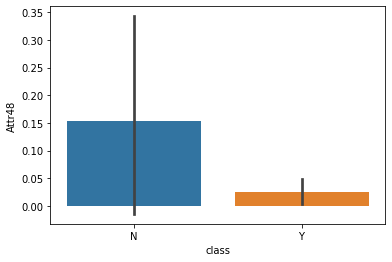

In [48]:
ax = sns.barplot(x="class",y="Attr48",data=datasetf)

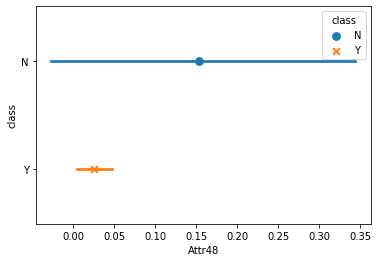

In [46]:
ax = sns.pointplot(y="class", x="Attr48",hue="class",
                   data=datasetf,
                   markers=["o", "x"],
                   linestyles=["-", "--"])

# Rentabilidad

## Rentabilidad de los activos: Utilidad de operación/activo total

AttributeError: 'AxesSubplot' object has no attribute 'get_axes'

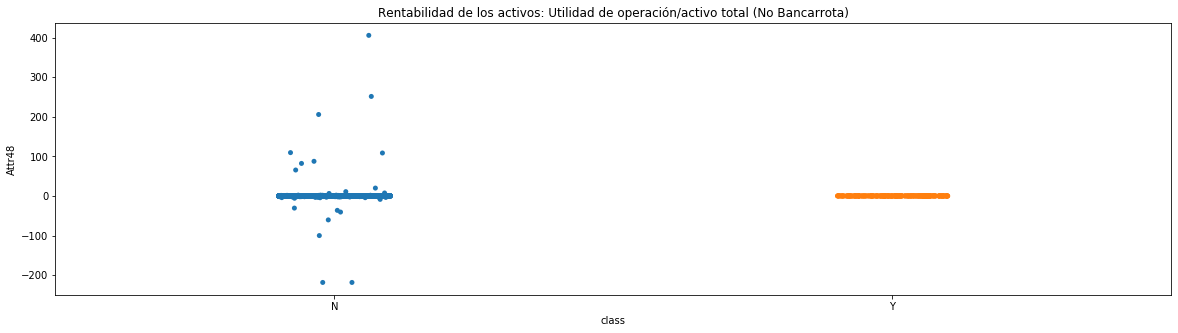

In [53]:
class_1 = datasetf.loc[datasetf['class'] == 'N']["Attr48"]
class_0 = datasetf.loc[datasetf['class'] == 'Y']["Attr48"]
plt.figure(figsize = (20,5))
plt.title('Rentabilidad de los activos: Utilidad de operación/activo total (No Bancarrota)')
a=sns.set_color_codes("pastel")
a=sns.stripplot(x="class",y="Attr48",data=datasetf)
a=fig.get_axes()[0].set_ylabel("Utilidad de operación/activo total")
plt.show()


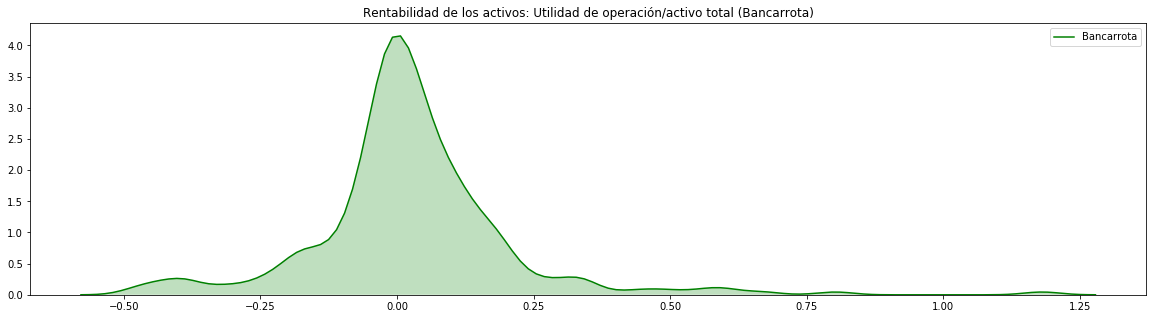

In [33]:
class_0 = datasetf.loc[datasetf['class'] == 'Y']["Attr48"]
plt.figure(figsize = (20,5))
plt.title('Rentabilidad de los activos: Utilidad de operación/activo total (Bancarrota)')
sns.set_color_codes("pastel")
sns.kdeplot(class_0,shade=True, color="green",label="Bancarrota")
plt.show()
##Empresa con Rentabilidad no determina si cae en Bancarrota

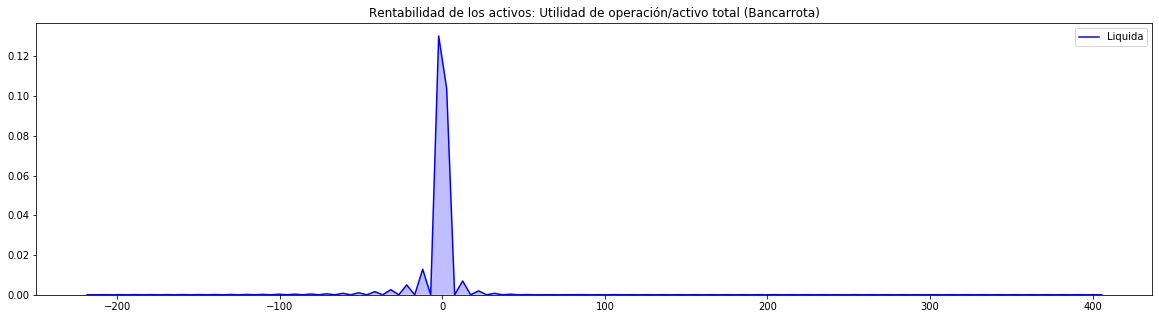

In [35]:
class_1 = datasetf.loc[datasetf['class'] == 'N']["Attr48"]
plt.figure(figsize = (20,5))
plt.title('Rentabilidad de los activos: Utilidad de operación/activo total (Bancarrota)')
sns.set_color_codes("pastel")
sns.kdeplot(class_1,shade=True, color="blue",label="Liquida")
plt.show()
##Empresa con Rentabilidad no determina si cae en Bancarrota

# Liquidez

## Activo circulante/pasivo circulante

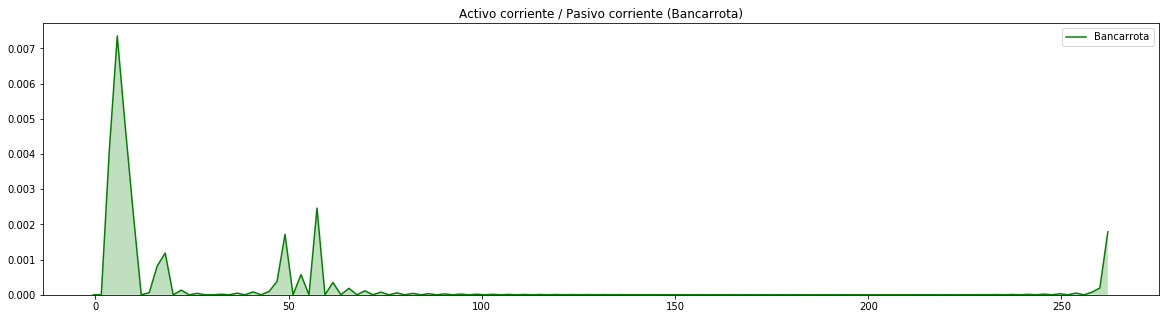

In [18]:
class_0 = datasetf.loc[datasetf['class'] == 'Y']["Attr50"]
plt.figure(figsize = (20,5))
plt.title('Activo corriente / Pasivo corriente (Bancarrota)')
sns.set_color_codes("pastel")
sns.kdeplot(class_0,shade=True, color="green",label="Bancarrota")
plt.show()

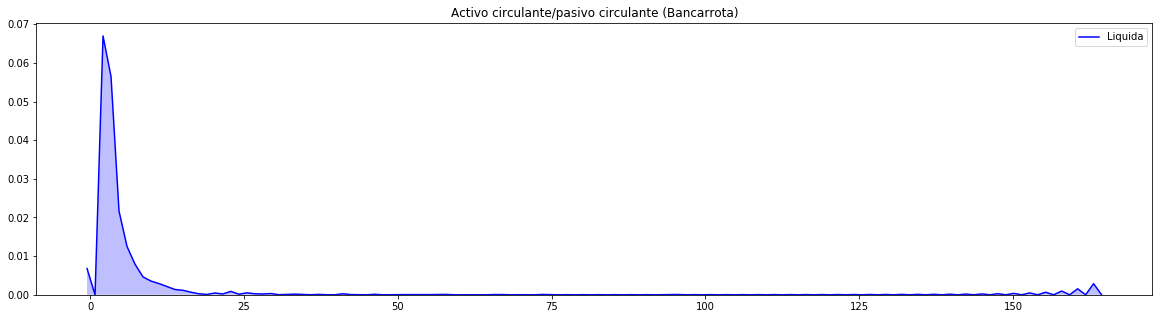

In [19]:
class_1 = datasetf.loc[datasetf['class'] == 'N']["Attr50"]
plt.figure(figsize = (20,5))
plt.title('Activo circulante/pasivo circulante (Bancarrota)')
sns.set_color_codes("pastel")
sns.kdeplot(class_1,shade=True, color="blue",cbar=True,label="Liquida")
plt.show()

##Empresas con más liquidez si es agente determinador si es cercano a nulo

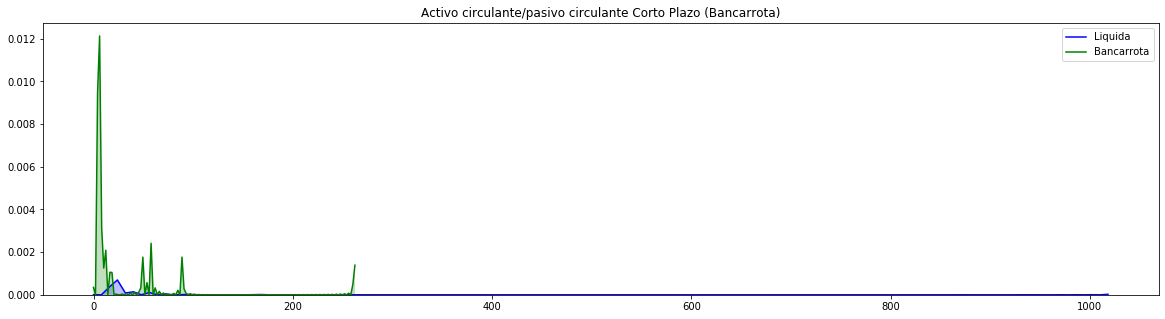

In [20]:
class_1 = datasetf.loc[datasetf['class'] == 'N']["Attr4"]
class_0 = datasetf.loc[datasetf['class'] == 'Y']["Attr4"]
plt.figure(figsize = (20,5))
plt.title('Activo circulante/pasivo circulante Corto Plazo (Bancarrota)')
sns.set_color_codes("pastel")
sns.kdeplot(class_1,shade=True, color="blue",cbar=True,label="Liquida")
sns.kdeplot(class_0,shade=True, color="green", cbar=True,label="Bancarrota")
plt.show()

#Si se analiza a corto Plazo, contar con liquidez permite determinar si empresa sera bancarrota

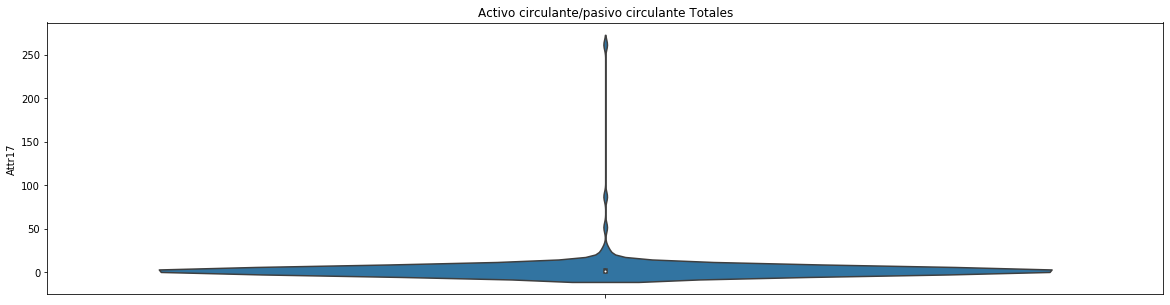

In [21]:
class_1 = datasetf.loc[datasetf['class'] == 'N']["Attr17"]
class_0 = datasetf.loc[datasetf['class'] == 'Y']["Attr17"]
plt.figure(figsize = (20,5))
plt.title('Activo circulante/pasivo circulante Totales')
sns.set_color_codes("pastel")
sns.violinplot( y=class_0)
plt.show()

##En terminos generales, si la empresa posee total activos para sus pasivos corresponde a un comportamiento importante

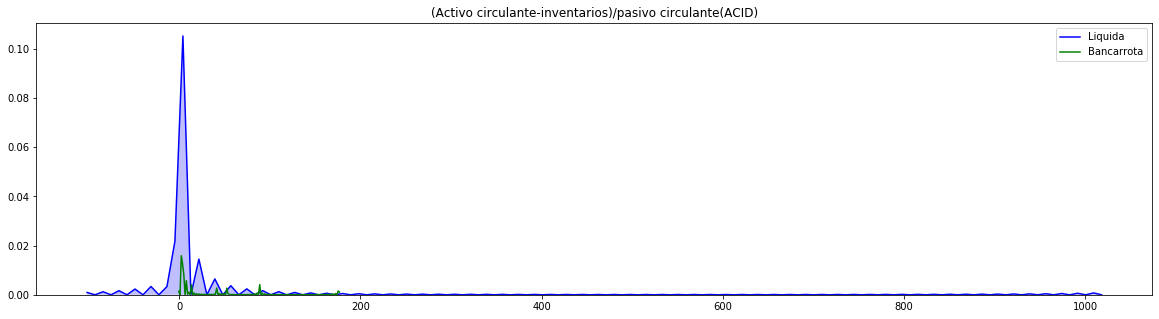

In [22]:
class_1 = datasetf.loc[datasetf['class'] == 'N']["Attr46"]
class_0 = datasetf.loc[datasetf['class'] == 'Y']["Attr46"]
plt.figure(figsize = (20,5))
plt.title('(Activo circulante-inventarios)/pasivo circulante(ACID)')
sns.set_color_codes("pastel")
sns.kdeplot(class_1,shade=True, color="blue",cbar=True,label="Liquida")
sns.kdeplot(class_0,shade=False, color="green", cbar=True,label="Bancarrota")
plt.show()

# Solvencia

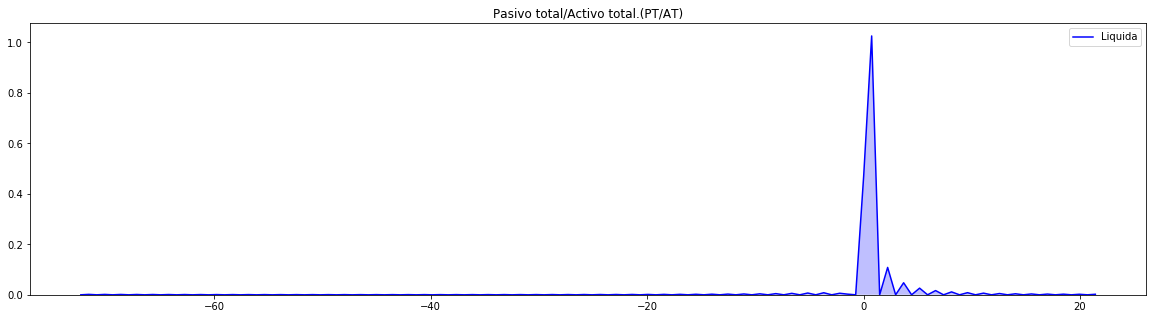

In [23]:
class_1 = datasetf.loc[datasetf['class'] == 'N']["Attr2"]
class_0 = datasetf.loc[datasetf['class'] == 'Y']["Attr2"]
plt.figure(figsize = (20,5))
plt.title('Pasivo total/Activo total.(PT/AT)')
sns.set_color_codes("pastel")
sns.kdeplot(class_1,shade=True, color="blue",cbar=True,label="Liquida")
plt.show()

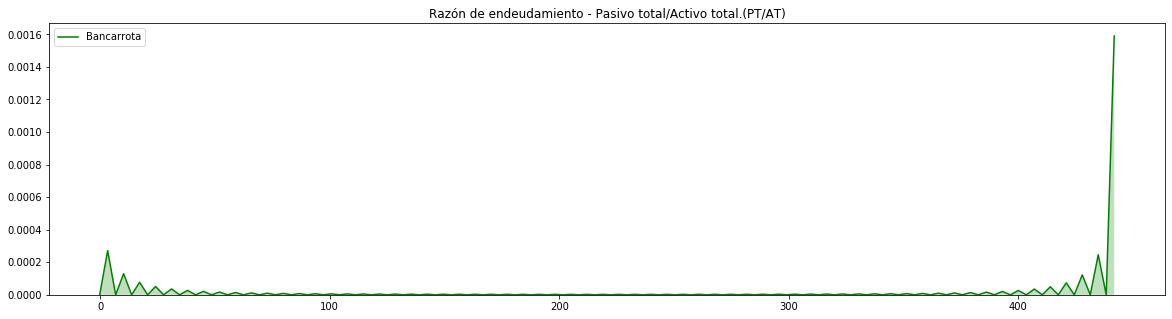

In [24]:
class_1 = datasetf.loc[datasetf['class'] == 'N']["Attr2"]
class_0 = datasetf.loc[datasetf['class'] == 'Y']["Attr2"]
plt.figure(figsize = (20,5))
plt.title('Razón de endeudamiento - Pasivo total/Activo total.(PT/AT)')
fig=sns.set_color_codes("pastel")
fig=sns.kdeplot(class_0,shade=True, color="green", cbar=True,label="Bancarrota")
plt.show()
##asd

In [25]:
datasetf.loc[datasetf['class'] == 'Y']["Attr2"]

6756    0.874460
6757    0.827750
6758    0.098723
6759    0.760570
6760    0.953480
          ...   
7022    0.474100
7023    0.583540
7024    0.502760
7025    0.848100
7026    0.946480
Name: Attr2, Length: 271, dtype: float64

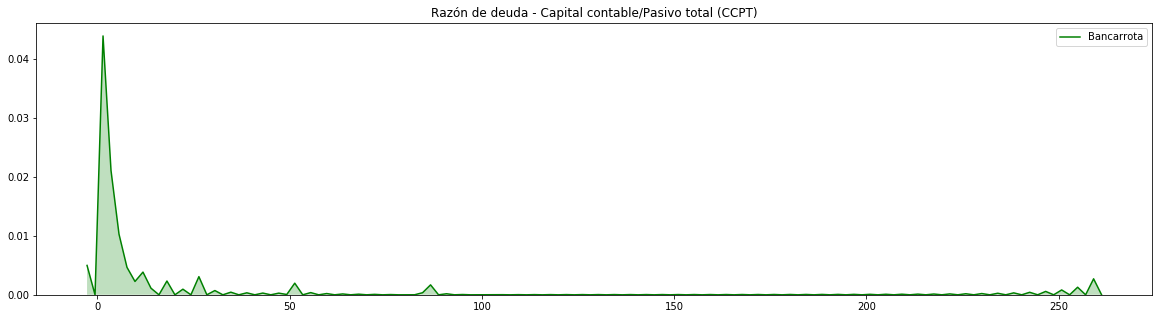

In [26]:
class_1 = datasetf.loc[datasetf['class'] == 'N']["Attr8"]
class_0 = datasetf.loc[datasetf['class'] == 'Y']["Attr8"]
plt.figure(figsize = (20,5))
plt.title('Razón de deuda - Capital contable/Pasivo total (CCPT)')
sns.set_color_codes("pastel")
sns.kdeplot(class_0,shade=True, color="green", cbar=True,label="Bancarrota")
plt.show()
## Cantidad de deuda de una empresa

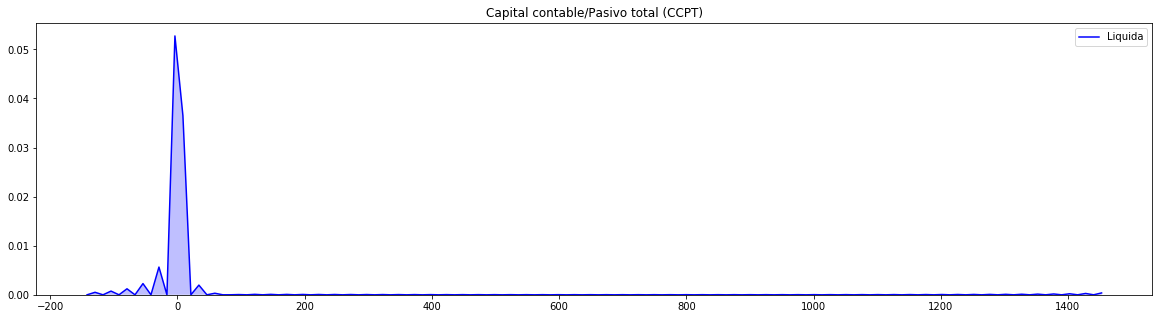

In [27]:
class_1 = datasetf.loc[datasetf['class'] == 'N']["Attr8"]
class_0 = datasetf.loc[datasetf['class'] == 'Y']["Attr8"]
plt.figure(figsize = (20,5))
plt.title('Capital contable/Pasivo total (CCPT)')
sns.set_color_codes("pastel")
sns.kdeplot(class_1,shade=True, color="blue",cbar=True,label="Liquida")

plt.show()
##Se denota que las empresas no tienen deudas o es corta

In [28]:
datasetf.loc[datasetf['class'] == 'N']["Attr2"].describe()

count    6756.000000
mean        0.490426
std         0.982069
min       -72.162000
25%         0.292160
50%         0.476010
75%         0.673758
max        21.261000
Name: Attr2, dtype: float64